In [28]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
import utils

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow import feature_column
from sklearn.model_selection import train_test_split

In [29]:
audio_files = glob('/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/*/*.wav')

In [30]:
ipd.Audio(audio_files[0])

In [31]:
y, sr = librosa.load(audio_files[1])


In [32]:
y.shape


(88200,)

In [33]:
y_trimmed, _ = librosa.effects.trim(y)

In [34]:
sr

22050

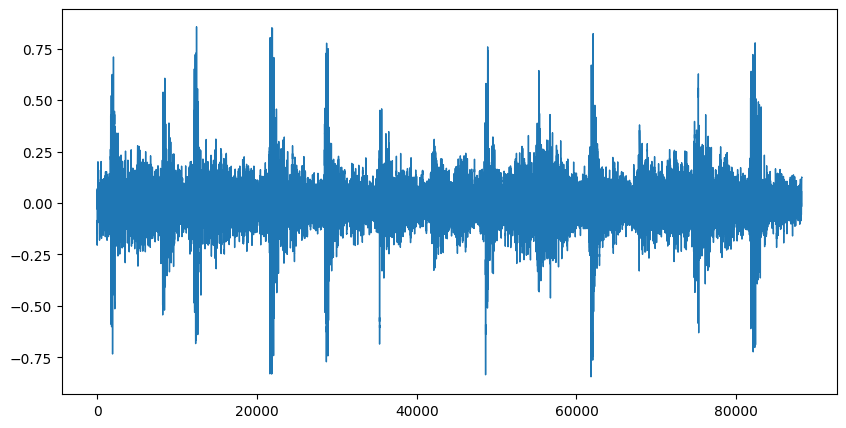

In [35]:
pd.Series(y).plot(figsize=(10, 5), lw=1)
plt.show()

In [36]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

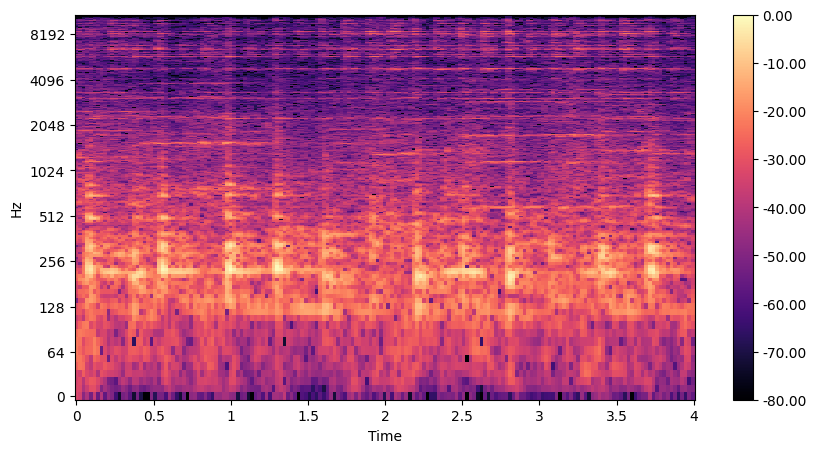

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [38]:
S=librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S.shape
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


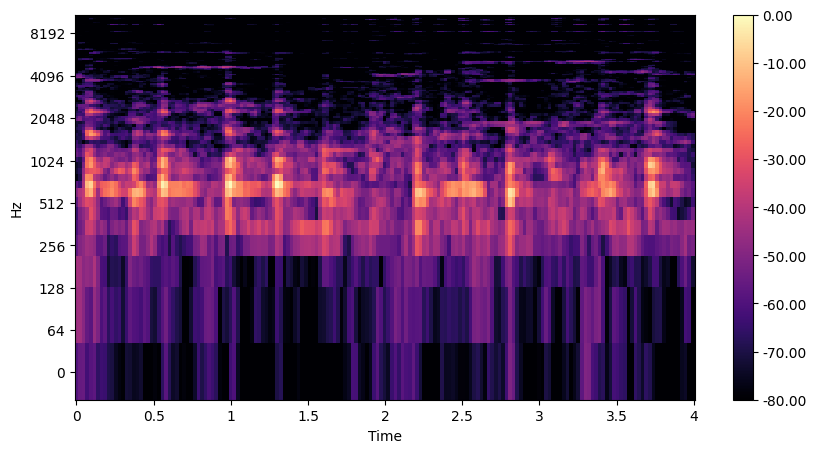

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [40]:
for i in range(10):
    y, sr = librosa.load(audio_files[i])
    print(sr)

22050
22050
22050
22050
22050
22050
22050
22050
22050
22050


In [41]:
durations = []

In [42]:
audio = utils.uniform_duration(22050, audio_files[0])
audio

array('/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/203929-7-5-1.wav',
      dtype='<U74')

In [43]:
print(audio_files)  # Ensure this list contains only valid file paths

['/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/203929-7-5-1.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/196384-9-0-2.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/169098-7-4-6.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/123688-8-0-4.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/174994-3-0-0.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/18453-3-0-0.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/109703-2-0-134.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/147926-0-0-44.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/123688-8-0-13.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/203929-7-7-3.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/147926-0-0-50.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/169098-7-4-11.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2

In [44]:
'''for i in range(len(audio_files)):
    audio, _ = librosa.load(audio_files[i])
    audio = utils.uniform_duration(22050, audio)

    duration = len(audio) / 22050

    durations.append({
        "file_name": f"audio_{i}",
        
        "duration_seconds": duration
    })

df_durations = pd.DataFrame(durations)

df_durations.to_csv("DURATIONS.CSV", index=False)'''

'for i in range(len(audio_files)):\n    audio, _ = librosa.load(audio_files[i])\n    audio = utils.uniform_duration(22050, audio)\n\n    duration = len(audio) / 22050\n\n    durations.append({\n        "file_name": f"audio_{i}",\n        \n        "duration_seconds": duration\n    })\n\ndf_durations = pd.DataFrame(durations)\n\ndf_durations.to_csv("DURATIONS.CSV", index=False)'

In [45]:
print(audio_files)  # Ensure this list contains only valid file paths

['/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/203929-7-5-1.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/196384-9-0-2.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/169098-7-4-6.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/123688-8-0-4.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/174994-3-0-0.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/18453-3-0-0.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/109703-2-0-134.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/147926-0-0-44.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/123688-8-0-13.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/203929-7-7-3.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/147926-0-0-50.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/169098-7-4-11.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2

In [46]:
'''for i in range(len(audio_files)):
    audio, _ = librosa.load(audio_files[i])
    audio = audio / np.max(np.abs(audio))  # Scale to [-1, 1]'''


'for i in range(len(audio_files)):\n    audio, _ = librosa.load(audio_files[i])\n    audio = audio / np.max(np.abs(audio))  # Scale to [-1, 1]'

In [47]:
print(audio_files)  # Ensure this list contains only valid file paths

['/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/203929-7-5-1.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/196384-9-0-2.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/169098-7-4-6.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/123688-8-0-4.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/174994-3-0-0.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/18453-3-0-0.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/109703-2-0-134.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/147926-0-0-44.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/123688-8-0-13.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/203929-7-7-3.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/147926-0-0-50.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2/169098-7-4-11.wav', '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/audio/fold2

In [48]:
'''for i in range(len(audio_files)):
    audio, sr = librosa.load(audio_files[i], sr=22050)
    audio = audio / np.max(np.abs(audio))
    

    print(f"Audio {i}: Min = {audio.min()}, Max = {audio.max()}")'''

'for i in range(len(audio_files)):\n    audio, sr = librosa.load(audio_files[i], sr=22050)\n    audio = audio / np.max(np.abs(audio))\n    \n\n    print(f"Audio {i}: Min = {audio.min()}, Max = {audio.max()}")'

In [49]:
'''print(utils.feature_extraction(audio_files[0]))'''

'print(utils.feature_extraction(audio_files[0]))'

In [50]:
files = glob('/Users/gabrielasimon/Desktop/ac2/teste/fold1/*.wav')

In [51]:
'''for i in range(len(audio_files)):
    audio, _ = librosa.load(audio_files[i])
    audio = audio / np.max(np.abs(audio)) '''

'for i in range(len(audio_files)):\n    audio, _ = librosa.load(audio_files[i])\n    audio = audio / np.max(np.abs(audio)) '

In [52]:
columns = [
    "file_id", "fold", 
    "mfcc_mean", "mfcc_std",
    "chroma_mean", "chroma_std",
    "spectral_contrast_mean", "spectral_contrast_std",
    "tonnetz_mean", "tonnetz_std",
    "zero_crossing_rate_mean", "zero_crossing_rate_std", 
    "rmse_mean", "rmse_std", 
    "spectral_rolloff_mean", "spectral_roloff_std",
    "centroid_mean", "centroid_std",
    "bandwidth_mean", "bandwidth_std",
    "contrast_mean", "contrast_std",
    "mel_spectrogram_mean", "mel_spectrogram_std"
]

features_list = []

#utils.feature_extraction(audio_files, features_list, columns)

In [53]:
features_csv = '/Users/gabrielasimon/Desktop/ac2/feature_extraction.csv'
target_csv = '/Users/gabrielasimon/Desktop/ac2/UrbanSound8K/metadata/UrbanSound8K.csv'
csv_file = utils.add_target_column(features_csv, target_csv)

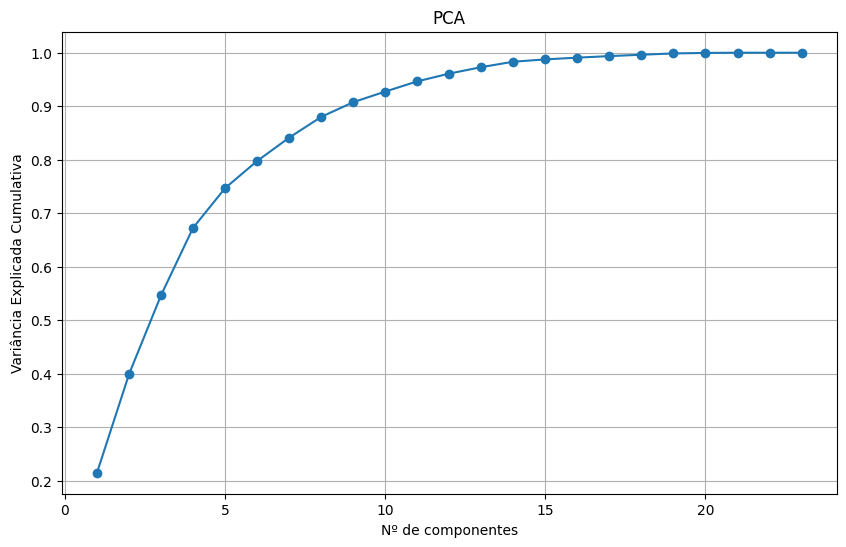

In [54]:

utils.perform_pca(csv_file, target_column='class')

In [55]:
#df = pd.read_csv(csv_file)

train, test = train_test_split(csv_file, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

5588 train examples
1397 validation examples
1747 test examples
